In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from itertools import chain
from nltk import FreqDist
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [5]:
review_data = pd.read_csv("review_final.csv")

# removing the duplicates
review_data.drop_duplicates(subset=['review_id','date','user_id'],inplace=True) 
review_data.set_index('Unnamed: 0')

,Unnamed: 0.1,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,address,review_count,hours,is_open
Unnamed: 0,,,,,,,,,,,,,,,
2,1,Vou3XAgjYJBuCO_-h1OQaA,M-00xuAOYLeaGEhPmmKjfg,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,Absolutely wonderful food & service! Go there ...,2011-04-23 00:52:05,Penang,117 N 10th St,1112,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1
3,2,hozoa1DsTCjpz4UC8YGsNw,ndgHYecgAWEqtjnjE7LtfA,MMRRS6YhVRx_iN5-JhMRYg,4,0,0,0,The new Han Dynasty took over the spot where t...,2012-10-08 15:29:44,Han Dynasty,3711 Market St,783,"{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",1
4,3,tfucaiy6lG5UbvbmTD4STg,wABHp4fGUC-0acRKhmQO2A,MMRRS6YhVRx_iN5-JhMRYg,5,0,0,0,"Awesome food, great place to split a bunch of ...",2016-03-07 00:22:02,Han Dynasty,3711 Market St,783,"{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",1
5,4,bu0BUkenT8c8nnyKUaF0-A,qmpRRF4HAKuGJEujoK-IdQ,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,"I've been coming to this place for years now, ...",2016-02-24 14:34:27,Penang,117 N 10th St,1112,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1
6,5,KEY5K6jrl18LLtyZ8bfDxg,_2kdAzmaR6KrWzjBMLoiog,KgozvZ1UFfXuJToqe8CfQg,4,0,0,0,"Nothing extraordinary, but if you want some si...",2015-11-06 00:02:47,Fortune Chinese Restaurant,1828 S St,87,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56943,56942,fb_xKUoJb-A2wWTSmFndfg,pGmbV55YLG54t8r1W4F3xg,-1B9pP_CrRBJYPICE5WbRA,5,1,0,1,Spice 28 is a great happy hour option in the h...,2021-11-08 15:15:45,Spice 28,1228 Chestnut St,822,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:30...",1
56944,56943,4yFZtkdc7SPueWozB6zmwQ,ttg9bK1FuUDZQNIleuR-KQ,ytynqOUb3hjKeJfRj5Tshw,5,0,1,0,"If it wasn't for my friend dragging me out, I ...",2019-12-21 18:46:06,Reading Terminal Market,51 N 12th St,5721,"{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",1
56945,56944,d_POWSXOV2S7QSO6SOfCNg,I2owOyPHlcXYfhXr8hvodw,-1B9pP_CrRBJYPICE5WbRA,3,0,0,1,"So, myself and my person decided to try someth...",2015-10-29 00:58:39,Spice 28,1228 Chestnut St,822,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:30...",1


### Generate sentiment scores

In [6]:
# quantify the review column to sentiment value
sid = SentimentIntensityAnalyzer()
def sentiquantify(sen):
    score = sid.polarity_scores(sen)
    score = score['compound']
    return score


In [7]:
review_data['sentiment_score'] = review_data['text'].apply(sentiquantify)

In [8]:
review_data['sentiment_cag'] = review_data['sentiment_score'].apply(lambda x: 1 if x>0 else 0)
review_data

,Unnamed: 0.1,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,address,review_count,hours,is_open,sentiment_score,sentiment_cag
0,1,2,Vou3XAgjYJBuCO_-h1OQaA,M-00xuAOYLeaGEhPmmKjfg,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,Absolutely wonderful food & service! Go there ...,2011-04-23 00:52:05,Penang,117 N 10th St,1112,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,0.9431,1
1,2,3,hozoa1DsTCjpz4UC8YGsNw,ndgHYecgAWEqtjnjE7LtfA,MMRRS6YhVRx_iN5-JhMRYg,4,0,0,0,The new Han Dynasty took over the spot where t...,2012-10-08 15:29:44,Han Dynasty,3711 Market St,783,"{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",1,0.9482,1
2,3,4,tfucaiy6lG5UbvbmTD4STg,wABHp4fGUC-0acRKhmQO2A,MMRRS6YhVRx_iN5-JhMRYg,5,0,0,0,"Awesome food, great place to split a bunch of ...",2016-03-07 00:22:02,Han Dynasty,3711 Market St,783,"{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",1,0.9562,1
3,4,5,bu0BUkenT8c8nnyKUaF0-A,qmpRRF4HAKuGJEujoK-IdQ,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,"I've been coming to this place for years now, ...",2016-02-24 14:34:27,Penang,117 N 10th St,1112,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,0.8481,1
4,5,6,KEY5K6jrl18LLtyZ8bfDxg,_2kdAzmaR6KrWzjBMLoiog,KgozvZ1UFfXuJToqe8CfQg,4,0,0,0,"Nothing extraordinary, but if you want some si...",2015-11-06 00:02:47,Fortune Chinese Restaurant,1828 S St,87,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,0.9538,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47309,56942,56943,fb_xKUoJb-A2wWTSmFndfg,pGmbV55YLG54t8r1W4F3xg,-1B9pP_CrRBJYPICE5WbRA,5,1,0,1,Spice 28 is a great happy hour option in the h...,2021-11-08 15:15:45,Spice 28,1228 Chestnut St,822,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:30...",1,0.8504,1
47310,56943,56944,4yFZtkdc7SPueWozB6zmwQ,ttg9bK1FuUDZQNIleuR-KQ,ytynqOUb3hjKeJfRj5Tshw,5,0,1,0,"If it wasn't for my friend dragging me out, I ...",2019-12-21 18:46:06,Reading Terminal Market,51 N 12th St,5721,"{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",1,-0.5145,0
47311,56944,56945,d_POWSXOV2S7QSO6SOfCNg,I2owOyPHlcXYfhXr8hvodw,-1B9pP_CrRBJYPICE5WbRA,3,0,0,1,"So, myself and my person decided to try someth...",2015-10-29 00:58:39,Spice 28,1228 Chestnut St,822,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:30...",1,0.9207,1
47312,56945,56946,UKSW7aMzc32KQC_eNwRazg,iTA7VqmHkEX3sUtJLpxHdw,qDEcJ48kXdWxQGZefgG94w,5,2,0,0,Incredible and amazing. We always come here wh...,2019-07-01 06:38:29,Xun Yu Si Kao,140 N 10th St,114,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,0.8453,1


### Generate TFIDF 

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# remove stopwords
def remove_stopwords(data):
    review = data.apply(lambda x: ' '.join([y for y in x.split() if len(y)>2]))
    review_new = review.apply(lambda x: ' '.join([y for y in x.split() if y not in stop_words]))
    review_new = review_new.apply(str.lower)
    return review_new

In [10]:
review_new = remove_stopwords(review_data['text'])

In [11]:
review_final =  remove_stopwords(review_data['text'][review_data['business_id'] =="-1B9pP_CrRBJYPICE5WbRA"])

In [12]:
X_review = review_final
y = review_data['sentiment_cag'][review_data['business_id'] =="-1B9pP_CrRBJYPICE5WbRA"]

In [13]:
tfidf = TfidfVectorizer(ngram_range=(2,2),stop_words = 'english',max_df = 0.70)
X_tfidf = tfidf.fit_transform(X_review)

In [14]:
word = tfidf.get_feature_names_out()

### Fit Logistic Regression Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state=0)
print('# train records: {}'.format(X_train.shape[0]))
print('# test records: {}'.format(X_test.shape[0]))

# train records: 638
# test records: 213


In [16]:
def text_reg(model,coef_show=1):
    ml = model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : word, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
        
        
text_reg(LogisticRegression())

Model Accuracy: 0.9014084507042254

-Top 20 positive-
           Word  Coefficient
     happy hour     0.578413
  service great     0.338885
        dan dan     0.300250
    green curry     0.299463
    really good     0.270020
        dry pot     0.260862
    dan noodles     0.260364
    center city     0.244786
 pepper chicken     0.240196
spicy cucumbers     0.235519
 food delicious     0.215300
 staff friendly     0.209214
drunken noodles     0.204371
      good food     0.201766
     great food     0.198195
  great service     0.192998
    chicken pad     0.187117
     love place     0.185796
indian pancakes     0.178032
       spice 28     0.178025

-Top 20 negative-
            Word  Coefficient
       food took    -0.315345
      new philly    -0.319899
  sichuan dishes    -0.320868
     looked like    -0.321591
     got takeout    -0.330741
      order food    -0.333192
     ordered pad    -0.341963
    bland flavor    -0.350911
    dishes bland    -0.350911
    flavor mushy  

### Sentiment Score by class

In [62]:
from itertools import chain

In [63]:
# return list from series of \n-seperated lines
def chainer(s):
    return list(chain.from_iterable(s.str.split('\n')))

# calculate lengths of splits
lens = review_data['text'].str.split('\n').map(len)

# create new data frames, repeating or chaining as appropriate
review_segment = pd.DataFrame({'review_id' : np.repeat(review_data['review_id'],lens),
                    'business_name': np.repeat(review_data['name'],lens),
                    'stars':np.repeat(review_data['stars'],lens),
                    'text': chainer(review_data['text'])})


In [64]:
review_segment['sentiment_score'] = review_segment['text'].apply(sentiquantify)

In [65]:
review_segment['sentiment_cag'] = review_segment['sentiment_score'].apply(lambda x: 1 if x>0 else 0)

<AxesSubplot:xlabel='Category', ylabel='Sentiment Score'>

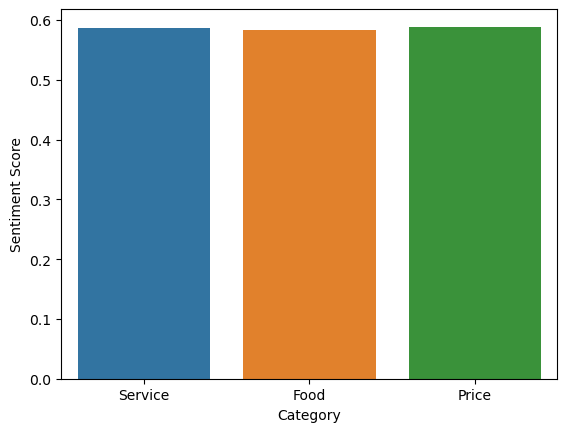

In [89]:
service_data = review_segment[(review_segment['text'].str.contains('service|wait'))&(review_segment['business_name']== 'Spice 28')]
food_data = review_segment[(review_segment['text'].str.contains('food|taste|dish'))&(review_segment['business_name']== 'Spice 28')]
service_score = service_data['sentiment_score'].groupby(service_data['business_name']).mean()
food_score = food_data['sentiment_score'].groupby(food_data['business_name']).mean()
price_data = review_segment[(review_segment['text'].str.contains('price'))&(review_segment['business_name']== 'Spice 28')]
price_score = price_data['sentiment_score'].groupby(price_data['business_name']).mean()
X = ["Service","Food","Price"]
y = [service_score.values[0],food_score.values[0],price_score.values[0]]
df = pd.DataFrame({"Category":X,"Sentiment Score":y})
sns.barplot(data=df, x="Category", y="Sentiment Score")


### Meat Dish Advice

In [161]:
service_data = review_segment[review_segment['text'].str.contains('service')]
food_data = review_segment[review_segment['text'].str.contains('food|taste|dish')]
meat_data = review_segment[review_segment['text'].str.contains('chicken|fish|chick|pork|beef')]
service_score = service_data['sentiment_score'].groupby(service_data['business_name']).mean()
meat_score = meat_data['sentiment_score'].groupby(meat_data['business_name']).mean()
meat_data[meat_data['business_name']=='Lee How Fook']

,review_id,business_name,stars,text,sentiment_score,sentiment_cag
12,O-82THmpn2akCqYgrMEA_A,Lee How Fook,2,Okay now to the main course - food! For appet...,0.6415,1
13,SZUscLQYenYn4HnxoQ7axw,Lee How Fook,5,"I could write a lengthy review, persuasive and...",0.7783,1
35,ubAwjFvLEY7fL57ACNMqlA,Lee How Fook,5,"Really love their food, IMO the best chinese i...",0.8655,1
35,ubAwjFvLEY7fL57ACNMqlA,Lee How Fook,5,"If ordering the General Tso chicken, ask for t...",0.3612,1
38,ay0493EA_0iESECjxE93XA,Lee How Fook,1,The food and service were sooo disappointing I...,0.0593,1
...,...,...,...,...,...,...
3608,ubS8tArLePdfQ_W1K7CWIw,Lee How Fook,2,"Pork with mushrooms, bamboo shoots is again no...",0.5343,1
3608,ubS8tArLePdfQ_W1K7CWIw,Lee How Fook,2,"Could go back for salt-baked squid, snow pea l...",0.9224,1
3614,CFpbfKjQ5PHft8k628gZEg,Lee How Fook,1,I ordered for delivery because of the good rev...,0.9521,1
3627,hwP5CTIltaq3jJoW9qbOhg,Lee How Fook,4,The Flavored Beef Brisket Hot Pot (gnow-nom-fa...,0.9266,1


In [213]:
model = LogisticRegression()
tfidf_meat = TfidfVectorizer(ngram_range=(2,3),stop_words = 'english',max_df = 0.7)
X_meat = tfidf_meat.fit_transform(meat_data['text'])

In [214]:
word_meat = pd.Series(tfidf_meat.get_feature_names_out())[pd.Series(tfidf_meat.get_feature_names_out()).str.contains('chicken|fish|chick|pork|beef')]
meat_index = word_meat.index
word = pd.Series(tfidf_meat.get_feature_names_out())
ml_meat = model.fit(X_meat, meat_data['sentiment_cag'])
coef = ml_meat.coef_.tolist()[0]
coef_meat = [coef[i] for i in meat_index]

In [215]:
coeff_df = pd.DataFrame({'Word' : word_meat, 'Coefficient' : coef_meat})
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
print('')
print('-Top 10 positive-')
print(coeff_df.head(10).to_string(index=False))
print('')
print('-Top 10 negative-')        
print(coeff_df.tail(10).to_string(index=False))


-Top 20 positive-
              Word  Coefficient
     beef chow fun     1.279134
 chicken delicious     1.125640
      chicken good     1.105814
      good chicken     0.879130
sweet sour chicken     0.863301
         beef chow     0.856447
       beef tender     0.819214
      sour chicken     0.725326
      chicken best     0.713407
         good pork     0.707904

-Top 20 negative-
           Word  Coefficient
ordered chicken    -1.342263
     style beef    -1.360137
   chicken feet    -1.388262
 orange chicken    -1.423948
  chicken wings    -1.432611
   roasted pork    -1.466525
    pepper beef    -1.656479
     fried pork    -1.728443
  fried chicken    -1.834510
 sesame chicken    -2.098135
